In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [2]:
dev_set = pd.read_csv("../data/assignment1_dev_set.csv")
val_set = pd.read_csv("../data/assignment1_val_set.csv")

In [3]:
dev_set.drop(columns=['Unnamed: 0', 'Project ID', 'Experiment type', 'Sex', 'Host age', 'BMI'])  # Assuming BMI is the target column

,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,D006262,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.000000,0.00000,0.117827,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,D006262,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.000000,0.00000,0.073486,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,D006262,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.000000,0.00000,0.043590,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,D006262,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.348570,0.00000,0.026474,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,D006262,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.000000,0.00000,1.732770,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,D006262,0.000000,0.000000,0.000000,0.000000,0.509040,0.015800,0.018390,0.06278,0.059660,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002160,0.000000,0.000000
485,D006262,0.000000,0.000000,0.000000,0.000000,0.005112,0.015139,0.000000,0.00000,0.020054,...,0.000000,0.017105,0.001770,0.032834,0.000000,0.000590,0.000393,0.000000,0.000197,0.004522
486,D006262,0.000000,0.000000,0.000000,0.000000,0.052094,0.093770,0.000000,0.00000,0.211850,...,0.000000,0.309092,0.052094,0.197958,0.000000,0.006946,0.000000,0.017365,0.065986,0.000000
487,D006262,0.001556,0.001556,0.122888,0.000000,0.000000,0.001556,0.045111,0.00000,0.090222,...,0.017111,0.057555,0.000000,0.054444,0.000000,0.045111,0.010889,0.000000,0.009333,0.018667


In [6]:
dev_set.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


In [7]:
dev_set.describe()

,Unnamed: 0,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,489.000000,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,244.000000,46.703497,24.93955,0.016818,0.029968,0.294917,0.001608,1.555914,0.249606,0.061796,...,0.029822,0.247603,0.032148,0.097871,0.052936,0.038531,0.006565,0.012565,0.041855,0.091976
std,141.306405,15.728231,4.20771,0.145035,0.197816,0.804704,0.010431,4.306539,0.630670,0.239054,...,0.090605,0.490321,0.180606,0.197044,0.310313,0.122225,0.018357,0.097056,0.181979,0.416085
min,0.000000,19.000000,16.97000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.000000,31.000000,22.38000,0.000000,0.000000,0.000000,0.000000,0.003438,0.003380,0.000000,...,0.000000,0.002570,0.000000,0.004881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.000000,52.000000,25.10000,0.000000,0.000000,0.001109,0.000000,0.034284,0.044961,0.000000,...,0.000260,0.047224,0.000000,0.029362,0.000000,0.001687,0.000000,0.000000,0.003266,0.007035
75%,366.000000,58.000000,25.80000,0.000000,0.000000,0.129398,0.000000,0.820242,0.188550,0.045111,...,0.027723,0.303173,0.005768,0.100294,0.015439,0.018352,0.005693,0.000000,0.020020,0.020978
max,488.000000,81.000000,67.26000,2.861300,2.622820,7.660350,0.206426,38.834900,6.068670,4.478660,...,1.465160,3.714530,3.118150,1.801190,4.726220,1.173380,0.273194,1.939150,2.478070,6.752840


In [57]:
dev_set.columns[:6]

Index(['Unnamed: 0', 'Project ID', 'Experiment type', 'Sex', 'Host age',
       'BMI'],
      dtype='object')

In [37]:
print("columns:", len(dev_set.columns))
#print("rows:", len(dev_set.rows))

columns: 141


In [ ]:
cols_species = dev_set.columns[7:]  

# Determine grid layout (rows and columns)
num_cols = len(cols_species)
num_rows = math.ceil(num_cols / 5)  # Adjust columns per row if needed

# Plot histograms before standardization
plt.figure(figsize=(15, num_rows * 3))  
dev_set[cols_species].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, 5), edgecolor='black')
plt.suptitle("Before Standardization")
plt.show()

scaled_dev_set = dev_set.copy()
# Apply z-score standardization
scaler = StandardScaler()
scaled_dev_set[cols_species] = scaler.fit_transform(dev_set[cols_species])

# Plot histograms after standardization
plt.figure(figsize=(15, num_rows * 3))  
scaled_dev_set[cols_species].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, 5), edgecolor='black')
plt.suptitle("After Standardization")
plt.show()


In [42]:
# Save standardized dataset
scaled_dev_set.to_csv("../data/development_final_data.csv", index=False)

In [ ]:
cols_species_val = val_set.columns[7:]  

# Determine grid layout (rows and columns)
num_cols = len(cols_species_val)

scaled_val_set = val_set.copy()
# Apply z-score standardization
scaler = StandardScaler()
scaled_val_set[cols_species] = scaler.transform(val_set[cols_species])
# Save standardized dataset
scaled_val_set.to_csv("../data/evaluation_final_data.csv", index=False)

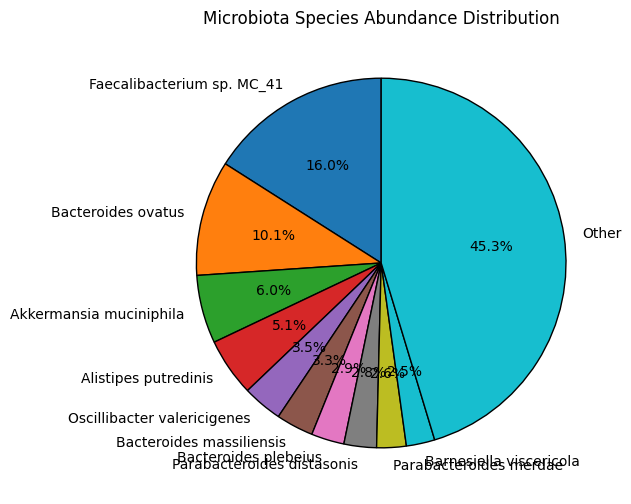

In [39]:
cols_species = dev_set.columns[7:]  
# Sum abundances for each species
species_sums = dev_set[cols_species].sum().sort_values(ascending=False)


# Select top 10 species and group the rest as "Other"
top_10_species = species_sums[:10]
other_species_sum = species_sums[10:].sum()

# Append "Other" category
top_10_species["Other"] = other_species_sum

# Plot pie chart
plt.figure(figsize=(10, 6))
top_10_species.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='tab10', 
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel("")
plt.title("Microbiota Species Abundance Distribution")
plt.show()


ValueError: pie plot doesn't allow negative values

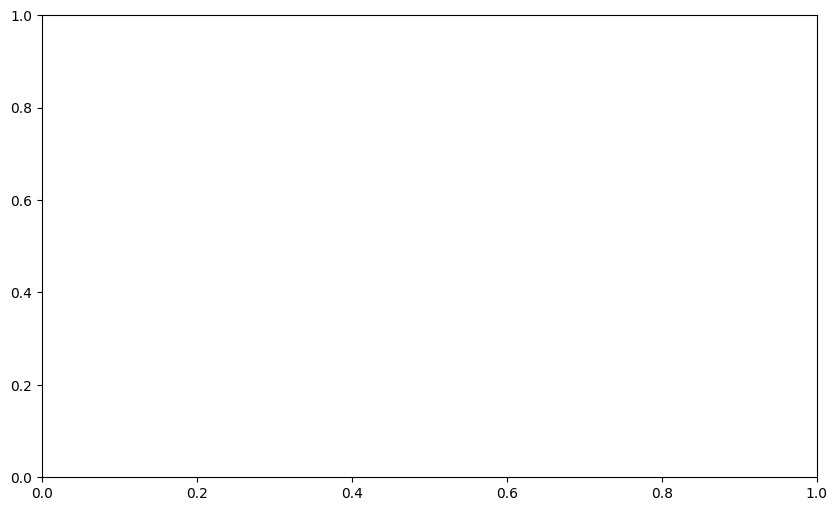

In [40]:
species_sums = scaled_dev_set[cols_species].sum().sort_values(ascending=False)

# Select top 10 species and group the rest as "Other"
top_10_species = species_sums[:10]
other_species_sum = species_sums[10:].sum()

# Append "Other" category
top_10_species["Other"] = other_species_sum

# Plot pie chart
plt.figure(figsize=(10, 6))
top_10_species.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    cmap='tab10', 
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel("")
plt.title("Microbiota Species Abundance Distribution")
plt.show()